In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [10]:
# Step 1: Load Data
df = pd.read_csv("forestfires.csv")  # Replace with actual file name

In [12]:
categorical_cols = ["month", "day"]  # Modify based on actual categorical columns in your dataset
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])  # Converts 'mar' → 2, 'jun' → 5, etc.

# Now apply median imputation safely
df.fillna(df.median(), inplace=True)
# Step 2: Handle Missing Values
df.fillna(df.median(), inplace=True)

In [13]:
# Step 3: Feature Selection
X = df.drop(columns=["area"])  # Features
y = df["area"]  # Target variable (continuous)

# Step 4: Standardize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Step 6: Train Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [16]:
# Step 7: Make Predictions
y_pred = rf_regressor.predict(X_test)

In [17]:
# Step 8: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 27.06
Mean Squared Error: 12009.59
Root Mean Squared Error: 109.59
R² Score: -0.02


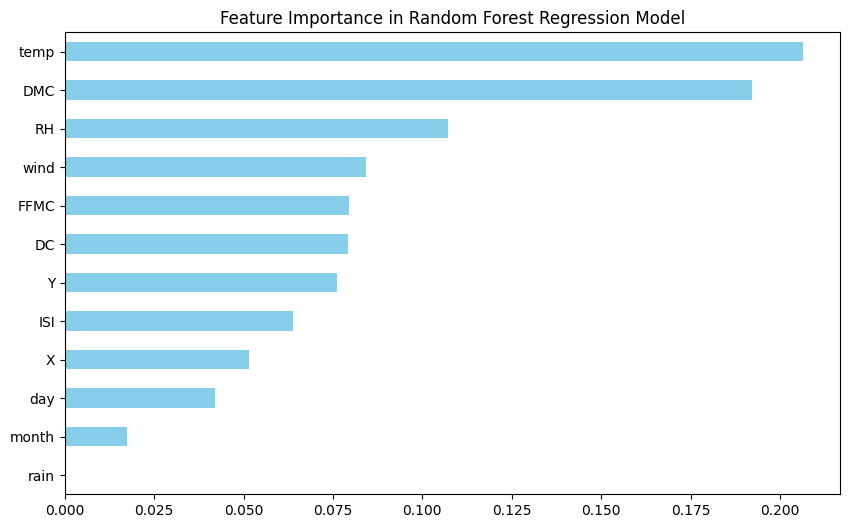

In [18]:
# Step 9: Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_regressor.feature_importances_, index=df.columns[:-1])
feature_importance.sort_values().plot(kind="barh", color="skyblue")
plt.title("Feature Importance in Random Forest Regression Model")
plt.show()

In [19]:
# Step 10: Real-time Prediction Function
def predict_fire_area():
    print("Enter wildfire parameters:")
    user_input = np.array([float(input(f"{col}: ")) for col in df.columns[:-1]]).reshape(1, -1)
    user_input_scaled = scaler.transform(user_input)
    prediction = rf_regressor.predict(user_input_scaled)
    print(f"\nPredicted Burned Area: {prediction[0]:.2f} hectares")

predict_fire_area()

Enter wildfire parameters:

Predicted Burned Area: 18.63 hectares


C:\Users\sujay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
